## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:
1. As the level of extroversion increases, the likelihood of being a left hander increases.
2. Persons that enjoy schedules and planning are more likely to be right-handed than left-handed.
3. Students who display greater empathy and social responsibility (as measured by the number of community service hours logged on average in a year in the university) are more likely to be right handed than left handed.

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv('data.csv')

In [3]:
df_test.head()

,Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10 Q11 Q12 Q13 Q14 Q15 Q16 Q17 Q18 Q19 Q20 Q21 Q22 Q23 Q24 Q25 Q26 Q27 Q28 Q29 Q30 Q31 Q32 Q33 Q34 Q35 Q36 Q37 Q38 Q39 Q40 Q41 Q42 Q43 Q44 introelapse testelapse country fromgoogle engnat age education gender orientation race religion hand
0,4\t1\t5\t1\t5\t1\t5\t1\t4\t1\t1\t1\t5\t5\t5\t1...
1,1\t5\t1\t4\t2\t5\t5\t4\t1\t5\t2\t5\t3\t4\t1\t4...
2,1\t2\t1\t1\t5\t4\t3\t2\t1\t4\t4\t5\t4\t3\t4\t1...
3,1\t4\t1\t5\t1\t4\t5\t4\t3\t5\t1\t3\t2\t3\t1\t5...
4,5\t1\t5\t1\t5\t1\t5\t1\t3\t1\t1\t1\t5\t5\t5\t1...


In [4]:
for row in df_test:
    print(row)

Q1	Q2	Q3	Q4	Q5	Q6	Q7	Q8	Q9	Q10	Q11	Q12	Q13	Q14	Q15	Q16	Q17	Q18	Q19	Q20	Q21	Q22	Q23	Q24	Q25	Q26	Q27	Q28	Q29	Q30	Q31	Q32	Q33	Q34	Q35	Q36	Q37	Q38	Q39	Q40	Q41	Q42	Q43	Q44	introelapse	testelapse	country	fromgoogle	engnat	age	education	gender	orientation	race	religion	hand


In [5]:
df_test.loc[0,] #separated by '\t'

Q1\tQ2\tQ3\tQ4\tQ5\tQ6\tQ7\tQ8\tQ9\tQ10\tQ11\tQ12\tQ13\tQ14\tQ15\tQ16\tQ17\tQ18\tQ19\tQ20\tQ21\tQ22\tQ23\tQ24\tQ25\tQ26\tQ27\tQ28\tQ29\tQ30\tQ31\tQ32\tQ33\tQ34\tQ35\tQ36\tQ37\tQ38\tQ39\tQ40\tQ41\tQ42\tQ43\tQ44\tintroelapse\ttestelapse\tcountry\tfromgoogle\tengnat\tage\teducation\tgender\torientation\trace\treligion\thand    4\t1\t5\t1\t5\t1\t5\t1\t4\t1\t1\t1\t5\t5\t5\t1...
Name: 0, dtype: object

In [6]:
df_ = []

with open("data.csv", "r") as f:
    temp = f.readlines()

    for temp_row in temp:
        temp_value = temp_row.split("\n")[0].split("\t")
        print(temp_value)
        df_.append(temp_value)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country', 'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation', 'race', 'religion', 'hand']
['4', '1', '5', '1', '5', '1', '5', '1', '4', '1', '1', '1', '5', '5', '5', '1', '5', '1', '5', '1', '5', '1', '1', '1', '5', '5', '5', '1', '5', '1', '1', '1', '1', '5', '5', '1', '1', '1', '5', '5', '5', '1', '5', '1', '91', '232', 'US', '2', '1', '22', '3', '1', '1', '3', '2', '3']
['1', '5', '1', '4', '2', '5', '5', '4', '1', '5', '2', '5', '3', '4', '1', '4', '1', '1', '1', '5', '2', '4', '4', '4', '1', '2', '1', '2', '1', '3', '1', '5', '2', '4', '4', '4', '4', '4', '1', '3', '1', '4', '4', '5', '17', '247', 'CA', '2', '1', '14', '1', '2', '2', '6', '

['1', '5', '2', '3', '1', '4', '1', '4', '2', '3', '4', '1', '1', '4', '2', '1', '1', '1', '5', '3', '2', '3', '5', '2', '4', '0', '2', '4', '2', '4', '2', '5', '1', '5', '1', '3', '3', '4', '1', '2', '3', '3', '1', '3', '4', '198', 'US', '2', '1', '21', '2', '2', '1', '6', '1', '1']
['3', '5', '3', '4', '5', '5', '4', '4', '2', '5', '4', '3', '2', '5', '3', '5', '5', '5', '5', '5', '3', '4', '5', '1', '1', '4', '1', '0', '3', '4', '2', '4', '1', '3', '3', '2', '1', '1', '1', '5', '1', '1', '1', '3', '4', '241', 'US', '1', '1', '25', '2', '2', '1', '6', '2', '1']
['3', '5', '5', '5', '5', '5', '5', '1', '5', '5', '3', '1', '1', '5', '5', '1', '3', '5', '5', '5', '5', '5', '5', '5', '1', '1', '5', '5', '1', '3', '1', '5', '1', '5', '5', '1', '5', '1', '5', '5', '5', '1', '5', '5', '22', '630', 'CA', '1', '1', '20', '2', '3', '1', '4', '1', '1']
['3', '5', '5', '5', '5', '5', '5', '2', '5', '5', '5', '1', '5', '5', '5', '5', '5', '5', '1', '5', '5', '5', '5', '5', '1', '5', '4', '5', '5'

In [7]:
df_

[['Q1',
  'Q2',
  'Q3',
  'Q4',
  'Q5',
  'Q6',
  'Q7',
  'Q8',
  'Q9',
  'Q10',
  'Q11',
  'Q12',
  'Q13',
  'Q14',
  'Q15',
  'Q16',
  'Q17',
  'Q18',
  'Q19',
  'Q20',
  'Q21',
  'Q22',
  'Q23',
  'Q24',
  'Q25',
  'Q26',
  'Q27',
  'Q28',
  'Q29',
  'Q30',
  'Q31',
  'Q32',
  'Q33',
  'Q34',
  'Q35',
  'Q36',
  'Q37',
  'Q38',
  'Q39',
  'Q40',
  'Q41',
  'Q42',
  'Q43',
  'Q44',
  'introelapse',
  'testelapse',
  'country',
  'fromgoogle',
  'engnat',
  'age',
  'education',
  'gender',
  'orientation',
  'race',
  'religion',
  'hand'],
 ['4',
  '1',
  '5',
  '1',
  '5',
  '1',
  '5',
  '1',
  '4',
  '1',
  '1',
  '1',
  '5',
  '5',
  '5',
  '1',
  '5',
  '1',
  '5',
  '1',
  '5',
  '1',
  '1',
  '1',
  '5',
  '5',
  '5',
  '1',
  '5',
  '1',
  '1',
  '1',
  '1',
  '5',
  '5',
  '1',
  '1',
  '1',
  '5',
  '5',
  '5',
  '1',
  '5',
  '1',
  '91',
  '232',
  'US',
  '2',
  '1',
  '22',
  '3',
  '1',
  '1',
  '3',
  '2',
  '3'],
 ['1',
  '5',
  '1',
  '4',
  '2',
  '5',
  '5',
  '4

In [8]:
column_names = df_.pop(0)

In [9]:
df_final = pd.DataFrame(df_, columns=column_names)

In [10]:
df_final.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [11]:
df_final.shape

(4184, 56)

In [12]:
df_final.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,...,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184
unique,6,6,6,6,6,6,6,6,6,6,...,94,2,3,66,5,4,6,8,8,4
top,1,5,1,5,1,5,5,4,1,5,...,US,2,1,18,2,2,1,6,1,1
freq,2521,2278,1515,1064,1247,1510,1138,1002,1327,1143,...,2468,2411,3130,369,2055,2212,2307,2793,1857,3542


In [13]:
for i in list(df_final.columns.values):
    print(i)
    print(df_final[i].unique())


Q1
['4' '1' '5' '3' '2' '0']
Q2
['1' '5' '2' '4' '3' '0']
Q3
['5' '1' '2' '4' '3' '0']
Q4
['1' '4' '5' '2' '3' '0']
Q5
['5' '2' '1' '4' '3' '0']
Q6
['1' '5' '4' '3' '2' '0']
Q7
['5' '3' '1' '4' '2' '0']
Q8
['1' '4' '2' '3' '5' '0']
Q9
['4' '1' '3' '5' '2' '0']
Q10
['1' '5' '4' '3' '2' '0']
Q11
['1' '2' '4' '5' '3' '0']
Q12
['1' '5' '3' '2' '4' '0']
Q13
['5' '3' '4' '2' '1' '0']
Q14
['5' '4' '3' '2' '1' '0']
Q15
['5' '1' '4' '3' '2' '0']
Q16
['1' '4' '5' '3' '2' '0']
Q17
['5' '1' '2' '3' '0' '4']
Q18
['1' '3' '2' '4' '5' '0']
Q19
['5' '1' '3' '4' '2' '0']
Q20
['1' '5' '3' '2' '4' '0']
Q21
['5' '2' '3' '4' '1' '0']
Q22
['1' '4' '3' '5' '2' '0']
Q23
['1' '4' '2' '5' '3' '0']
Q24
['1' '4' '5' '2' '3' '0']
Q25
['5' '1' '3' '4' '2' '0']
Q26
['5' '2' '4' '1' '3' '0']
Q27
['5' '1' '2' '4' '3' '0']
Q28
['1' '2' '4' '5' '3' '0']
Q29
['5' '1' '2' '3' '4' '0']
Q30
['1' '3' '4' '5' '2' '0']
Q31
['1' '3' '4' '5' '2' '0']
Q32
['1' '5' '3' '2' '4' '0']
Q33
['1' '2' '4' '3' '5' '0']
Q34
['5' '4' '1' '3

There seems to be 6 unique values for all the questions, when the notebook only has 5 (1= Disagree to 5 = Agree). Other fields also have some values containing '0' when it is not a valid input. We need to decide what to do with these terms - remove them if they are the minority and will not affect the dataset. Ages above 100 are also highly impossible ('123' '409' '23763').

In [14]:
# Replace '0' with np.nan

df_final.replace('0',np.nan, inplace= True)

In [15]:
df_final.dtypes

Q1             object
Q2             object
Q3             object
Q4             object
Q5             object
Q6             object
Q7             object
Q8             object
Q9             object
Q10            object
Q11            object
Q12            object
Q13            object
Q14            object
Q15            object
Q16            object
Q17            object
Q18            object
Q19            object
Q20            object
Q21            object
Q22            object
Q23            object
Q24            object
Q25            object
Q26            object
Q27            object
Q28            object
Q29            object
Q30            object
Q31            object
Q32            object
Q33            object
Q34            object
Q35            object
Q36            object
Q37            object
Q38            object
Q39            object
Q40            object
Q41            object
Q42            object
Q43            object
Q44            object
introelapse    object
testelapse

In [16]:
#Change Q1 to Q44 and age to numerical values
for i in list(df_final.columns.values):
    df_final[i] = pd.to_numeric(df_final[i], errors='ignore', downcast='integer')

    #try:
    #    df_final[i] = df_final[i].astype(int)
    #except:
    #    pass

In [17]:
df_final.dtypes

Q1             float64
Q2             float64
Q3             float64
Q4             float64
Q5             float64
Q6             float64
Q7             float64
Q8             float64
Q9             float64
Q10            float64
Q11            float64
Q12            float64
Q13            float64
Q14            float64
Q15            float64
Q16            float64
Q17            float64
Q18            float64
Q19            float64
Q20            float64
Q21            float64
Q22            float64
Q23            float64
Q24            float64
Q25            float64
Q26            float64
Q27            float64
Q28            float64
Q29            float64
Q30            float64
Q31            float64
Q32            float64
Q33            float64
Q34            float64
Q35            float64
Q36            float64
Q37            float64
Q38            float64
Q39            float64
Q40            float64
Q41            float64
Q42            float64
Q43            float64
Q44        

In [18]:
# Check for nulls
df_final.isnull().sum()

Q1               4
Q2              11
Q3              11
Q4              17
Q5              14
Q6              11
Q7              17
Q8               9
Q9              13
Q10             11
Q11             15
Q12             20
Q13             16
Q14             23
Q15             14
Q16             20
Q17             20
Q18             24
Q19             13
Q20             14
Q21             18
Q22             18
Q23             22
Q24             24
Q25             17
Q26             20
Q27             17
Q28             19
Q29             11
Q30             12
Q31             17
Q32             11
Q33             15
Q34             16
Q35             13
Q36             15
Q37             17
Q38             21
Q39             14
Q40             13
Q41             13
Q42             19
Q43             21
Q44             17
introelapse      0
testelapse       0
country          0
fromgoogle       0
engnat          25
age              0
education       51
gender          82
orientation 

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:
1. Collect anonymised data (No personal identifiers or full names)
2. Instead of collecting exact ages, know what we are going to analyse (plan beforehand), and only collect the data to the detail required. Avoid collecting data that is sensitive and not required. For example, if we are going to conduct the analysis on age bands instead of exact ages, do not collect the Date of Birth of the survey respondents as it will cause the data to be more identifiable.
3. Add a disclaimer clause for survey respondents to allow the data to be used in a aggregated form for the purposes of this study.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = df_final

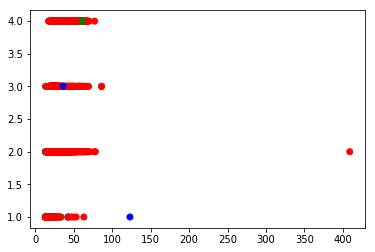

In [87]:
#create a scatter plot using two selected features

colors = ['red', 'green', 'blue'] # For 'hand' = 1,2,3
color_series = df['hand'].map(lambda s: colors[int(s)-1])
plt.scatter(df['age'], df['education'], color=color_series)

#Show the legend

In [88]:
df_subset = df[['hand','engnat','age','education','gender','orientation','race','religion']]

In [89]:
df_subset.dtypes

hand           float64
engnat         float64
age              int16
education      float64
gender         float64
orientation    float64
race           float64
religion       float64
dtype: object

C:\Users\gohch\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\gohch\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

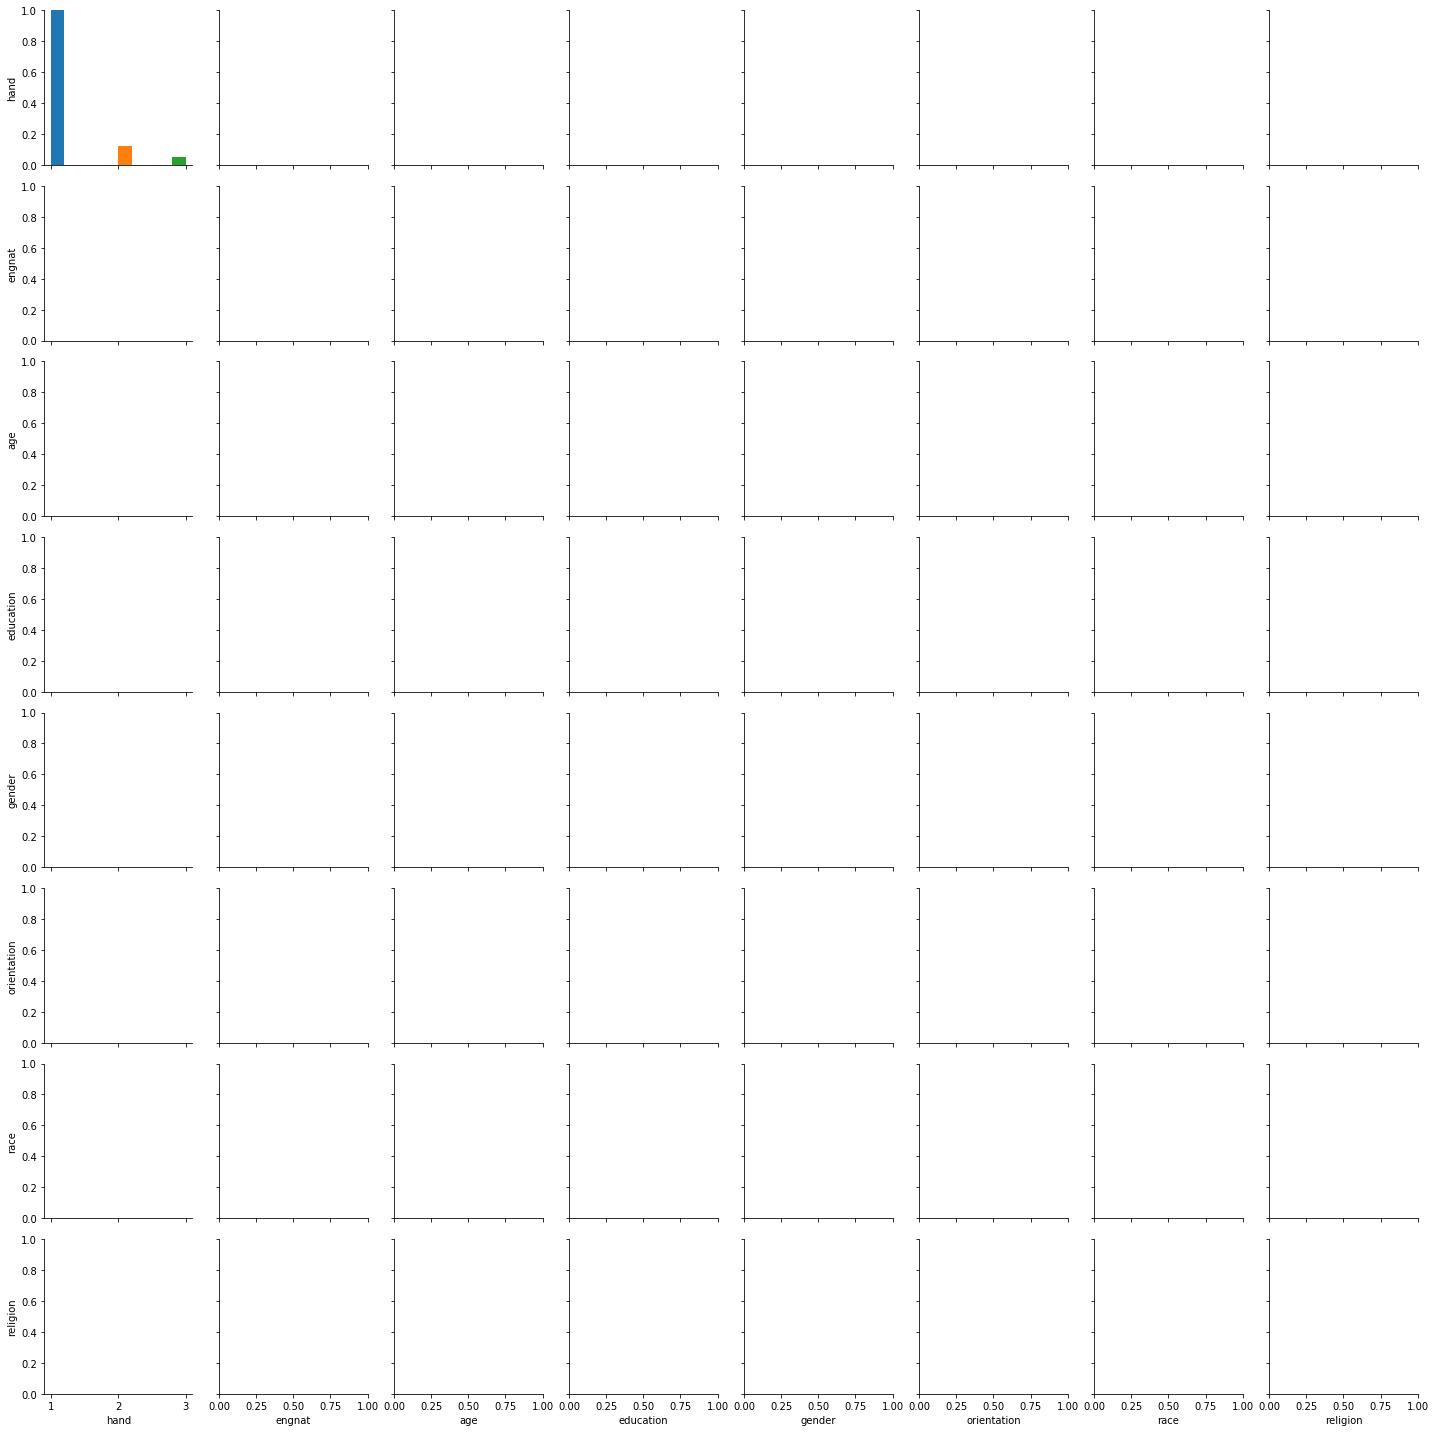

In [90]:
sns.pairplot(df_subset, hue='hand') #What is this error?

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification, as left-handed or right-handed are categorical variables.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: We would standardize our variables before doing K nearest neighbours, as it is a distance-based classifier that classifies new observations based on similar measures (e.g., distance metrics) with labeled observations of the training set. Standardization makes all variables contribute equally to the similarity measures.

### 7. Give an example of when we might not standardize our variables.

Answer: We do not need to standardise our variables when the units and the range of values of all variables are similar, and we are dealing with a model without a penalty variable e.g. linear regression.
At times, logistic regressions are not sensitive to the magnitude of variables. So standardization is not needed before fitting as well.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: Yes, we should standardize the predictor variables since we are using KNN.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: There are some '0' responses to the questions in the y-variable 'hand'. As there are not many such rows, we simply remove the rows of data completely.

In [21]:
df.dropna(subset=['hand'], inplace = True)

In [22]:
col_list = list(df_final.columns.values)

In [23]:
df.dropna(subset=col_list[:44], inplace = True)

In [24]:
df.shape
# Recall: Previous shape before removing null values was (4184, 56). 
# Less than 10% of the rows were removed, which is acceptable.

(3794, 56)

In [25]:
df.isnull().sum() # Successfully removed all null values from y variable 'hand'.
# should i remove the null x values as well? 

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
Q12              0
Q13              0
Q14              0
Q15              0
Q16              0
Q17              0
Q18              0
Q19              0
Q20              0
Q21              0
Q22              0
Q23              0
Q24              0
Q25              0
Q26              0
Q27              0
Q28              0
Q29              0
Q30              0
Q31              0
Q32              0
Q33              0
Q34              0
Q35              0
Q36              0
Q37              0
Q38              0
Q39              0
Q40              0
Q41              0
Q42              0
Q43              0
Q44              0
introelapse      0
testelapse       0
country          0
fromgoogle       0
engnat          21
age              0
education       48
gender          74
orientation 

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: Setting k = 4 is bad because the data set contains almost 4000 responses, and k = 4 could be too few. It is likely that setting k = 4 will result in overfitting the model.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [27]:
features = col_list[:44]

In [28]:
X = df[features]
y = df['hand']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y) 
# optional to include random_state = xx

In [30]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Model 1: k = 3

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=3)

In [32]:
knn1.fit(X_train, y_train);

In [33]:
knn1.score(X_train, y_train)

0.8632619439868204

In [34]:
knn1.score(X_test, y_test)

0.8102766798418972

### Model 2: k = 5

In [35]:
knn2 = KNeighborsClassifier(n_neighbors=5) # default n_neighbours (k) is 5

In [36]:
knn2.fit(X_train, y_train); # p is 2 indicates default Euclidean distance. 1 is Manhattan.

In [37]:
knn2.score(X_train, y_train)

0.8527182866556837

In [38]:
knn2.score(X_test, y_test)

0.839262187088274

### Model 3: k = 15

In [39]:
knn3 = KNeighborsClassifier(n_neighbors=15)

In [40]:
knn3.fit(X_train, y_train);

In [41]:
knn3.score(X_train, y_train)

0.8527182866556837

In [42]:
knn3.score(X_test, y_test)

0.852437417654809

### Model 4: k = 25

In [43]:
knn4 = KNeighborsClassifier(n_neighbors=25)

In [44]:
knn4.fit(X_train, y_train);

In [45]:
knn4.score(X_train, y_train)

0.8527182866556837

In [46]:
knn4.score(X_test, y_test)

0.852437417654809

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: Yes there is default regularization as mentioned in the documentation. By default, the parameter solver='lbfgs'. From the documentation: The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. A quick search says that L2 is Ridge regularization (while L1 is Lasso).

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: There is no need to standardize features for logistic regression here. We would standardize in logistic regression if the x variables were using different scales (different units or ranges). However, all the x variables are on the same scale of 1 to 5. Unnecessarily standardizing the features may result in more difficult interpretation in some cases.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [47]:
from sklearn.linear_model import LogisticRegression

### Model 5: LASSO, alpha=  1

In [48]:
logreg1 = LogisticRegression(penalty = 'l1', C = 1) # C is 1/alpha

In [49]:
logreg1.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg1.intercept_}')
print(f'Logistic Regression Coefficient: {logreg1.coef_}')

Logistic Regression Intercept: [ 1.19800382 -0.66132177 -4.6685006 ]
Logistic Regression Coefficient: [[-3.70822328e-02  3.98207834e-02 -4.64734680e-02  0.00000000e+00
  -2.48088600e-02  4.38394949e-02 -3.74317780e-02  1.51703394e-01
   4.91564539e-02  1.45903566e-03 -4.10068210e-02  0.00000000e+00
  -3.84927873e-02  4.88171851e-02 -1.77810753e-03 -1.84505120e-02
  -6.04043442e-02  1.42276570e-02 -8.10310473e-03 -1.02650293e-02
   1.23913649e-01  7.13232883e-02  6.79373541e-02  3.44312765e-02
   9.01066771e-03 -1.08095718e-01 -1.42156383e-01  4.76384816e-03
  -4.59340044e-02  5.92326744e-03  1.23248505e-02 -1.87676939e-02
  -7.45390973e-03  1.62154597e-02 -1.19102733e-01  3.38861437e-02
  -1.60155242e-02 -1.18019076e-01  1.05484245e-01  6.20211310e-03
   4.78562257e-02 -7.09809255e-04  1.25508153e-01  5.23478325e-03]
 [-4.48646348e-03 -3.54486717e-02 -1.25782087e-02 -8.77185348e-02
   5.15906453e-02  1.37027488e-02  8.52850754e-03 -1.80425887e-01
  -7.08537845e-02  5.77352906e-02  3.20

In [50]:
logreg1.score(X_train, y_train)

0.8527182866556837

In [51]:
logreg1.score(X_test, y_test)

0.852437417654809

### Model 6: LASSO, alpha = 10

In [52]:
logreg2 = LogisticRegression(penalty = 'l1', C = 0.1) # C is 1/alpha

In [73]:
logreg2.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg2.intercept_}')
print(f'Logistic Regression Coefficient: {logreg2.coef_}')

Logistic Regression Intercept: [0. 0. 0.]
Logistic Regression Coefficient: [[-0.01774383  0.0445818  -0.03403496  0.         -0.01705394  0.04920575
  -0.01015041  0.18292766  0.04125772  0.01202478 -0.00556498  0.00836632
   0.          0.03699122  0.          0.         -0.04910622  0.01450848
   0.          0.          0.15249465  0.07767862  0.07185945  0.04627945
   0.         -0.07856525 -0.01181388  0.         -0.02603546  0.0020291
   0.01664746  0.          0.          0.01517583 -0.10339913  0.0320714
   0.         -0.08475227  0.07559281  0.01158506  0.04954107  0.
   0.          0.00156184]
 [ 0.         -0.03334889  0.         -0.07660519  0.03223007  0.
   0.         -0.17434351 -0.05860291  0.01169186  0.00158428  0.
  -0.01455943  0.          0.          0.02741521  0.02192875  0.
  -0.02300481  0.         -0.07538107 -0.083423   -0.05648486 -0.0222789
   0.          0.08226185  0.         -0.02300654  0.02220319  0.
   0.         -0.00121296 -0.04868205 -0.03886858  0.

In [54]:
logreg2.score(X_train, y_train)

0.8527182866556837

In [55]:
logreg2.score(X_test, y_test)

0.852437417654809

### Model 7: Ridge, alpha = 1

In [56]:
logreg3 = LogisticRegression(penalty = 'l2', C = 1)

In [57]:
logreg3.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg3.intercept_}')
print(f'Logistic Regression Coefficient: {logreg3.coef_}')

Logistic Regression Intercept: [ 1.17206311 -0.7697396  -2.96407358]
Logistic Regression Coefficient: [[-0.03793152  0.04097065 -0.04846685  0.0005598  -0.02592447  0.04523174
  -0.03914787  0.15593168  0.05205795  0.00335499 -0.04216229 -0.00086108
  -0.03967496  0.05028696 -0.00373391 -0.02035557 -0.06128838  0.01595771
  -0.00988904 -0.01380676  0.12895407  0.07289365  0.06986569  0.03572063
   0.01167853 -0.11060728 -0.15807911  0.00628044 -0.04780292  0.007297
   0.01551466 -0.02078824 -0.00916553  0.01799675 -0.1199783   0.03505212
  -0.01827521 -0.12078113  0.10789987  0.00752325  0.04942469 -0.00230625
   0.14161509  0.00631578]
 [-0.00625654 -0.03599989 -0.01434684 -0.0890628   0.05320295  0.01802232
   0.01142378 -0.17998056 -0.07227194  0.06245222  0.03487314  0.01442943
  -0.01313797 -0.00143222 -0.01609081  0.0616454   0.04787672  0.02713344
  -0.02461964 -0.0052035  -0.08462974 -0.09219282 -0.05919727 -0.02336211
   0.00156687  0.12304827  0.08077118 -0.04921349  0.051122

In [58]:
logreg3.score(X_train, y_train)

0.8527182866556837

In [59]:
logreg3.score(X_test, y_test)

0.852437417654809

### Model 8: Ridge, alpha = 10

In [60]:
logreg4 = LogisticRegression(penalty = 'l2', C = 0.1)

In [61]:
logreg4.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg4.intercept_}')
print(f'Logistic Regression Coefficient: {logreg4.coef_}')

Logistic Regression Intercept: [ 0.41914153 -0.24382386 -0.61649263]
Logistic Regression Coefficient: [[-0.03362384  0.04580109 -0.05070378  0.00269068 -0.02640609  0.05077058
  -0.0324259   0.18172397  0.05744331  0.01312575 -0.03204882  0.00967238
  -0.02431218  0.04856407 -0.00555406 -0.01858939 -0.06206275  0.02101004
  -0.00040069 -0.00636707  0.15564845  0.08200991  0.07541184  0.04391935
   0.01886834 -0.10564058 -0.1403774   0.00268628 -0.04494144  0.00970269
   0.02654426 -0.01641352  0.0034005   0.02209374 -0.11750966  0.03914789
  -0.00967513 -0.11645508  0.10430656  0.01500277  0.05425837 -0.00276877
   0.1232859   0.00945119]
 [-0.00925203 -0.0392999  -0.01237513 -0.08831596  0.05253002  0.01264303
   0.00663783 -0.19483984 -0.07533406  0.05309277  0.02750615  0.00662974
  -0.02344474 -0.00202818 -0.01411527  0.05888337  0.04772523  0.02226285
  -0.0311893  -0.01014394 -0.10108097 -0.09679787 -0.06276628 -0.02945939
  -0.0034736   0.11808545  0.06478082 -0.04587384  0.0484

In [74]:
logreg4.score(X_train, y_train)

0.8527182866556837

In [75]:
logreg4.score(X_test, y_test) 
#when looking at over/underfitting, is it the .score or cross_val_score that we have to look at?

0.852437417654809

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: It is possible that some exposure to creative artistic activities (such as dancing) stimulates the right brain more, which increases the chance of a person being left handed or ambidextrous.
However based on my experience with the left handers I know among my friends, this is probably a weak correlation. I think the X variables will do a poor job at predicting Y.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [65]:
cross_val_score(logreg1, X_train, y_train, cv = 10).mean()

0.8527210539544718

In [66]:
cross_val_score(logreg2, X_train, y_train, cv = 10).mean()

0.8527210539544718

In [67]:
cross_val_score(logreg3, X_train, y_train, cv = 10).mean()

0.8527210539544718

In [68]:
cross_val_score(logreg4, X_train, y_train, cv = 10).mean()

0.8527210539544718

In [69]:
cross_val_score(knn1, X_train_sc, y_train, cv=10).mean() 
#cv is number of consecutive times the score is calculated (with different splits each time)

0.8201106384165777

In [70]:
cross_val_score(knn2, X_train_sc, y_train, cv=10).mean() 

0.8375698832518317

In [71]:
cross_val_score(knn3, X_train_sc, y_train, cv=10).mean() 

0.8527210539544718

In [72]:
cross_val_score(knn4, X_train_sc, y_train, cv=10).mean() 

0.8527210539544718

In [82]:
cross_val_score(knn4,X_test, y_test, cv = 10).mean()

0.8525051695578011

Answer: The accuracy of all models seems to tend towards 0.8527, and does not increase beyond it.

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: Overfitting is when there is high variance and low bias.

My knn1 and knn2 (k = 3 and k = 5 respectively) models show evidence of overfitting.
The cross_val_score for the training set is slightly greater than the test set.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases, bias goes up, and variance goes down (bias-variance tradeoff)

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: To combat overfitting, we can try

1. Using fewer parameters to reduce model complexity (if there are many x variables)
2. Including more rows of data to train the model
3. Use a smaller k


### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: The Lasso with alpha = 1, and both Ridge logistic regressions showed evidence of overfitting - all three models had cross_val_test scores higher on their training set than their testing set.

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: C = 1/alpha. As alpha increases, bias increases and variance decreases. Conversely, as C increases, bias decreases and variance increases (due to the bias-variance tradeoff).

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: As  C increases, the model becomes less overfit and the cross_val_score on the train drops relative to the cross_val_score on the test.

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:
1. Using fewer parameters to reduce model complexity (if there are many x variables)
2. Including more rows of data to train the model
3. Use a smaller C (or larger alpha since C = 1/alpha)
4. Regularization:  minimizes the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: Logistic regression. KNN is a non-parametric model, whereas LR is a parametric model.
KNN is slow in real time as it have to keep track of all training data and find the neighbor nodes, whereas LR can easily extract output from the tuned θ coefficients.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

Answer: Using odds ratio for logistic regression


In [86]:
# Use np.exp() to exponentiate the coefficient.
np.exp(logreg1.coef_)

array([[0.96361293, 1.0405181 , 0.95462169, 1.        , 0.97546288,
        1.04483412, 0.96325106, 1.16413925, 1.05032802, 1.00146942,
        0.95998392, 1.        , 0.96228285, 1.05006826, 0.99827837,
        0.98172922, 0.9414026 , 1.01437783, 0.99195871, 0.98966081,
        1.13220196, 1.07399706, 1.07033872, 1.03512372, 1.00900858,
        0.89753325, 0.86734429, 1.0047838 , 0.95511819, 1.00599317,
        1.01228947, 0.98142487, 0.99248547, 1.01640343, 0.88773333,
        1.0343997 , 0.98414342, 0.88865422, 1.11119021, 1.00625216,
        1.04924817, 0.99937278, 1.13389355, 1.00518791],
       [0.99544402, 0.96517281, 0.987509  , 0.91584001, 1.05305637,
        1.01384974, 1.00847161, 0.8349154 , 0.93160668, 1.05937937,
        1.03261957, 1.00929286, 0.98661169, 0.99986567, 0.98574642,
        1.06016122, 1.04709474, 1.02419308, 0.9760244 , 0.99598898,
        0.91862693, 0.91278587, 0.94346965, 0.97747025, 1.        ,
        1.12681007, 1.06164293, 0.95476756, 1.04949377, 1. 

In [77]:
### Model 5: LASSO, alpha=  1

logreg1 = LogisticRegression(penalty = 'l1', C = 1) # C is 1/alpha

logreg1.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg1.intercept_}')
print(f'Logistic Regression Coefficient: {logreg1.coef_}')

Logistic Regression Intercept: [ 1.19502458 -0.65987361 -4.67128026]
Logistic Regression Coefficient: [[-3.70655874e-02  3.97187575e-02 -4.64401555e-02  0.00000000e+00
  -2.48431761e-02  4.38581324e-02 -3.74411935e-02  1.51981971e-01
   4.91025134e-02  1.46833648e-03 -4.08387469e-02  0.00000000e+00
  -3.84468467e-02  4.88551755e-02 -1.72311605e-03 -1.84397522e-02
  -6.03843906e-02  1.42754514e-02 -8.07379491e-03 -1.03930123e-02
   1.24164376e-01  7.13872557e-02  6.79751629e-02  3.45209541e-02
   8.96824715e-03 -1.08105111e-01 -1.42319274e-01  4.77239144e-03
  -4.59201908e-02  5.97527996e-03  1.22145649e-02 -1.87498171e-02
  -7.54290493e-03  1.62703474e-02 -1.19083885e-01  3.38212590e-02
  -1.59836442e-02 -1.18047068e-01  1.05431705e-01  6.23269283e-03
   4.80738799e-02 -6.27417883e-04  1.25657327e-01  5.17449462e-03]
 [-4.56638625e-03 -3.54481209e-02 -1.25696634e-02 -8.79135859e-02
   5.16967606e-02  1.37547091e-02  8.43592772e-03 -1.80424876e-01
  -7.08445740e-02  5.76832340e-02  3.20

In [78]:
logreg1.score(X_train, y_train)

0.8527182866556837

In [79]:
logreg1.score(X_test, y_test)

0.852437417654809

In [84]:
cross_val_score(logreg1, X_train, y_train, cv = 3).mean()

0.8527190400914849

In [85]:
cross_val_score(logreg1, X_test, y_test, cv = 3).mean()

0.8431975070968566

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: I will pick Model 7 (logreg 3), Logistic regression with Ridge, alpha = 1. 

For Logistic Regression, it has the highest accuracy score and does not show evidence of overfitting/ underfitting as the train and test scores are similar.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer: The coefficients of the questions in the model I picked are not high. We may have to explore interaction variables with certain demographic variables to explore whether there is a relationship between left-handedness and the personality questionnaire.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)

In [ ]:
# Try poisson regression

In [ ]:
# For own reference from the codebook

### From codebook: This data was collected from an interactive version of the Open Sex Role Inventory in 2014.

#### The following items were rated on a five point scale, with the labels 1=Disagree, 3=Neutral, 5=Agree:

Q1	I have studied how to win at gambling.

Q2	I have thought about dying my hair.

Q3	I have thrown knives, axes or other sharp things.

Q4	I give people handmade gifts.

Q5	I have day dreamed about saving someone from a burning building.

Q6	I get embarrassed when people read things I have written.

Q7	I have been very interested in historical wars.

Q8	I know the birthdays of my friends.

Q9	I like guns.

Q10	I am happiest when I am in my bed.

Q11	I did not work very hard in school.

Q12	I use lotion on my hands.

Q13	I would prefer a class in mathematics to a class in pottery.

Q14	I dance when I am alone.

Q15	I have thought it would be exciting to be an outlaw.

Q16	When I was a child, I put on fake concerts and plays with my friends.

Q17	I have considered joining the military.

Q18	I get dizzy when I stand up sharply.

Q19	I do not think it is normal to get emotionally upset upon hearing about the deaths of people you did not know.

Q20	I sometimes feel like crying when I get angry.

Q21	I do not remember birthdays.

Q22	I save the letters I get.

Q23	I playfully insult my friends.

Q24	I oppose medical experimentation with animals.

Q25	I could do an impressive amount of push ups.

Q26	I jump up and down in excitement sometimes.

Q27	I think a natural disaster would be kind of exciting.

Q28	I wear a blanket around the house.

Q29	I have burned things up with a magnifying glass.

Q30	I think horoscopes are fun.

Q31	I don't pack much luggage when I travel.

Q32	I have thought about becoming a vegetarian.

Q33	I hate shopping.

Q34	I have kept a personal journal.

Q35	I have taken apart machines just to see how they work.

Q36	I take lots of pictures of my activities.

Q37	I have played a lot of video games.

Q38	I leave nice notes for people now and then.

Q39	I have set fuels, aerosols or other chemicals on fire, just for fun.

Q40	I really like dancing.

Q41	I take stairs two at a time.

Q42	I bake sweets just for myself sometimes.

Q43	I think a natural disaster would be kind of exciting.

Q44	I decorate my things (e.g. stickers on laptop).



#### On the next page the following questions were administered:

engnat	" Is English you native language?" 1=Yes, 2=No

age	"What is your age?", entered as text (ages <  13 not recorded)

education	"How much education have you completed?" 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree

gender	1=Male, 2=Female, 3=Other

orientation	1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other

race	1=Mixed race, 2=Asian, 3=Black, 4=Native American, 5=Native Australian, 6=White, 7=Other

religion	1=Atheist/Agnostic, 2=Christian, 3=Muslim, 4=Jewish, 5=Hindu, 6=Buddhist, 7=Other

hand	"What hand do you use to write with?" 	1=Right, 2=Left, 3=Both

#### The following technical data was also obtained:

country	where the users computer was located (using MaxMind GeoIPLite), ISO country code

fromgoogle 1=HTTP_referer contained '.google.', 2=it did not

introelapse	how many seconds from when the introduction page was loaded until the user started the test

testelapse	how many seconds from when the test was started until the page with the test items was submitted